This notebook contains plotting code for the ROBO2N selected sequences, and code to score the ROBO1 antibodies with a model trained on the ROBO2N sort.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

import logomaker
from Levenshtein import distance

In [2]:
IPI_VL_SEQS = ['VK1-39', 'VK3-15', 'VK3-20', 'VK4-01']
# IPI_VH_SEQS = ['VH1-46', 'VH1-69', 'VH3-7', 'VH3-15', 'VH4-39', 'VH5-51']
# IPI_VH_SEQS_V2 = ['VH1-46', 'VH1-69', 'VH3-7', 'VH3-15', 'VH5-51']
# IPI_VH_VL_SEQS = [vh + '; ' + vl for vh, vl in itertools.product(IPI_VH_SEQS, IPI_VL_SEQS)]
# IPI_VH_VL_SEQS_V2 = [vh + '; ' + vl for vh, vl in itertools.product(IPI_VH_SEQS_V2, IPI_VL_SEQS)]

IPI_VH_SEQS = ['VH1-69']
IPI_3_VL_SEQS = ['VK1-39', 'VK3-15', 'VK3-20']
IPI_VK41_VL_SEQS = ['VK4-1']

In [3]:
def add_cdr3_gaps(s, max_len=20):
    s2 = s[1:]
    cut_len_L = min((len(s2)+1) // 2, max_len // 2)
    cut_len_R = min(len(s2) // 2, (max_len-1) // 2)
    gap_len = max_len - 1 - cut_len_L - cut_len_R
    s2 = s[0] + s2[:cut_len_L] + "-" * gap_len + s2[-cut_len_R:]
    return s2

In [4]:
def min_levenshtein(seq1, seqs):
    return min(distance(seq1, s, score_cutoff=len(seq1)) for s in seqs)

def min_pairwise_levenshtein(seqs):
    prev_cdr3s = [""]
    distances = []
    for cdr3 in seqs:
        distances.append(min_levenshtein(cdr3, prev_cdr3s))
        prev_cdr3s.append(cdr3)
    return distances

In [5]:
df = pd.read_csv("selected_abs/aff1_subset_kmer_LR_hROBO2N_Test1_Lib31_withSPR.csv")

In [6]:
df2 = pd.read_csv("scores/hROBO2N_Test1_Lib31_kmer_aff3_scores.csv")

/var/folders/1g/c3dw8nsj7gs0d1dlsb3gcw340000gn/T/ipykernel_26063/3111380113.py:1: DtypeWarning: Columns (14,15,16,17,18,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("scores/hROBO2N_Test1_Lib31_kmer_aff3_scores.csv")


In [7]:
df.columns

Index(['CDR3', 'heavy', 'light', 'key', 'Macs1', 'Aff1', 'Aff2', 'Aff3',
       'Aff1_Macs1', 'Aff2_Macs1', 'Aff2_Aff1', 'Aff3_Macs1', 'Aff3_Aff1',
       'Aff3_Aff2', 'INDEX', 'TAB-ID', 'Antibody_Name', 'Antigen', 'HC', 'LC',
       'CDRH3', 'NGS_Aff1', 'NGS_Aff2', 'NGS_Aff3', 'PSR ', 'SEC', 'KD (nM)',
       'ka (1/Ms)', 'kdis (1/s)', 'Cell Display (Target 1) EC50 (nM)',
       'Cell Display_Cross Reactive_Human/Mouse (Target 2) EC50 (nM)',
       'Comments', 'LR_score', 'min_dist_to_ordered', 'min_pairwise_dist'],
      dtype='object')

In [8]:
df.dropna(subset="PSR ")

,CDR3,heavy,light,key,Macs1,Aff1,Aff2,Aff3,Aff1_Macs1,Aff2_Macs1,...,SEC,KD (nM),ka (1/Ms),kdis (1/s),Cell Display (Target 1) EC50 (nM),Cell Display_Cross Reactive_Human/Mouse (Target 2) EC50 (nM),Comments,LR_score,min_dist_to_ordered,min_pairwise_dist
0,CARGTWIFDY,VH1-69,VK3-15,CARGTWIFDY:VH1-69:VK3-15,NaN,248.0,9828.0,212114.0,8.276606,11.436996,...,Pass,22.40,940385.08350,0.020386,0.724261469,0.136065953,NaN,0.897746,NaN,NaN
1,CARGTWVFDY,VH1-69,VK3-15,CARGTWVFDY:VH1-69:VK3-15,2.0,409.0,7647.0,526.0,5.279839,7.689020,...,Pass,NaN,NaN,NaN,40.35779916,1.705833194,NaN,0.799098,NaN,NaN
2,CARNVEKFYAGAGFDY,VH1-69,VK3-15,CARNVEKFYAGAGFDY:VH1-69:VK3-15,NaN,69.0,1454.0,350.0,6.997284,9.526079,...,Fail,4.71,94514.03275,0.000482,0.78,0.59,NaN,0.961205,NaN,NaN
3,CARGVESYFTGTGFDP,VH1-69,VK3-15,CARGVESYFTGTGFDP:VH1-69:VK3-15,NaN,197.0,321.0,129.0,8.046381,8.015446,...,Fail,12.60,85197.19209,0.001111,68.41,70.77,NaN,0.850126,NaN,NaN
4,CARGTRIFDY,VH1-69,VK3-15,CARGTRIFDY:VH1-69:VK3-15,NaN,1.0,NaN,42.0,2.763177,0.000000,...,Pass,NaN,NaN,NaN,Fail,Fail,NaN,0.679974,NaN,NaN
5,CARGTWKFDY,VH1-69,VK3-15,CARGTWKFDY:VH1-69:VK3-15,NaN,NaN,NaN,32.0,0.000000,0.000000,...,Pass,NaN,NaN,NaN,Fail,Fail,NaN,0.660245,NaN,NaN


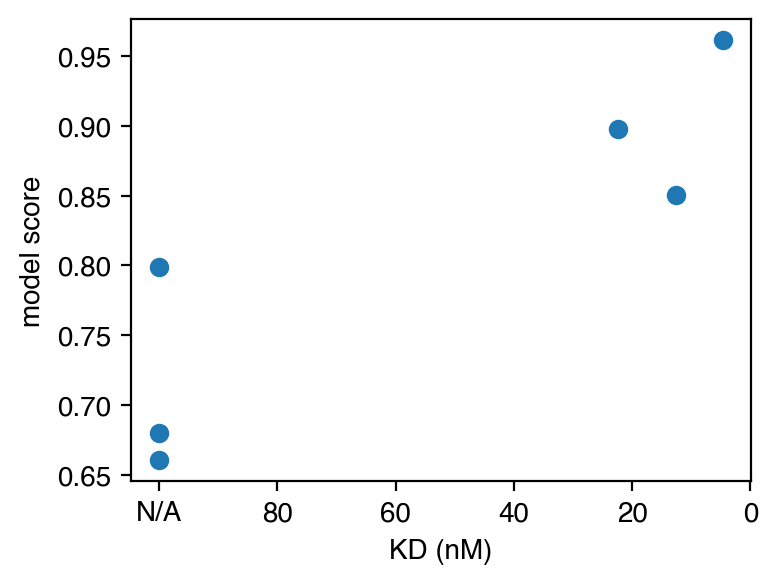

In [9]:
plot_df = df.dropna(subset="PSR ")
fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(plot_df["KD (nM)"].fillna(100), plot_df["LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "100" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

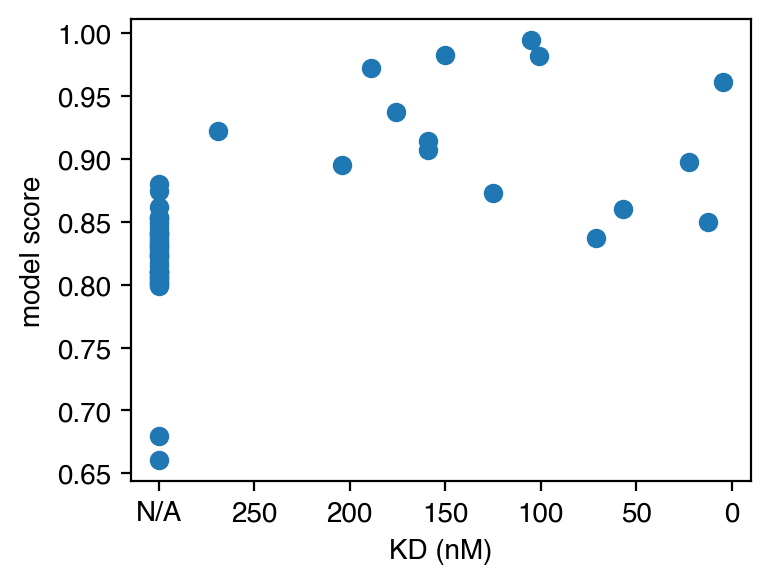

In [10]:
# plot_df = df.dropna(subset="PSR ")
fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(df["KD (nM)"].fillna(300), df["LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

In [11]:
ordered_df = df[df["Antibody_Name"].str.contains("Test1").fillna(False)]
ordered_success_df = df[df["Antibody_Name"].str.contains("Test1").fillna(False) & df["KD (nM)"].notnull()]
selected_df = df[df["Antibody_Name"].str.contains("Dmcollab").fillna(False)]
success_df = df[df["Antibody_Name"].str.contains("Dmcollab").fillna(False) & df["KD (nM)"].notnull()]

/var/folders/1g/c3dw8nsj7gs0d1dlsb3gcw340000gn/T/ipykernel_26063/1240202815.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordered_df = df[df["Antibody_Name"].str.contains("Test1").fillna(False)]
/var/folders/1g/c3dw8nsj7gs0d1dlsb3gcw340000gn/T/ipykernel_26063/1240202815.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ordered_success_df = df[df["Antibody_Name"].str.contains("Test1").fillna(False) & df["KD (nM)"].notnull()]
/var/folders/1g/c3dw8nsj7gs0d1dlsb3gcw340000gn/T/ipykernel_26063/1240202815.py:3: FutureWarning: Downcasting object dtype ar

In [12]:
ordered_df["CDR3"]

0          CARGTWIFDY
1          CARGTWVFDY
2    CARNVEKFYAGAGFDY
3    CARGVESYFTGTGFDP
4          CARGTRIFDY
5          CARGTWKFDY
Name: CDR3, dtype: object

Text(0, 0.5, 'bits')

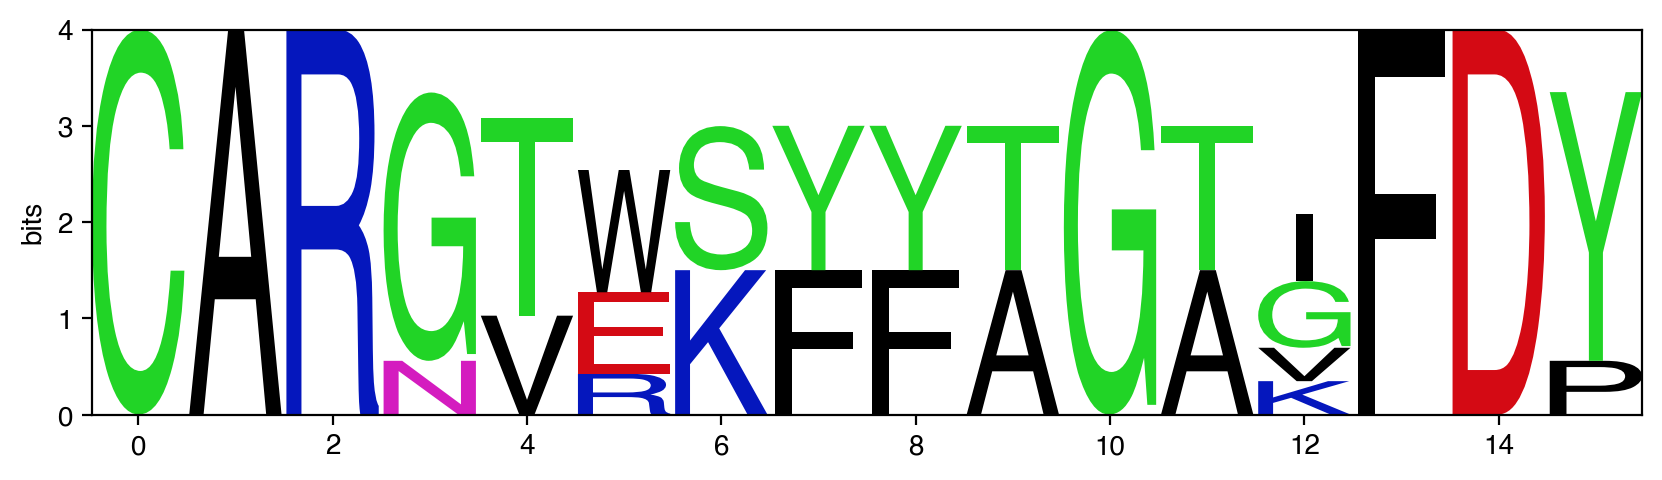

In [13]:
seqs = [add_cdr3_gaps(cdr3, max_len=ordered_df["CDR3"].str.len().max()) for cdr3 in ordered_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("bits")

Text(0, 0.5, 'bits')

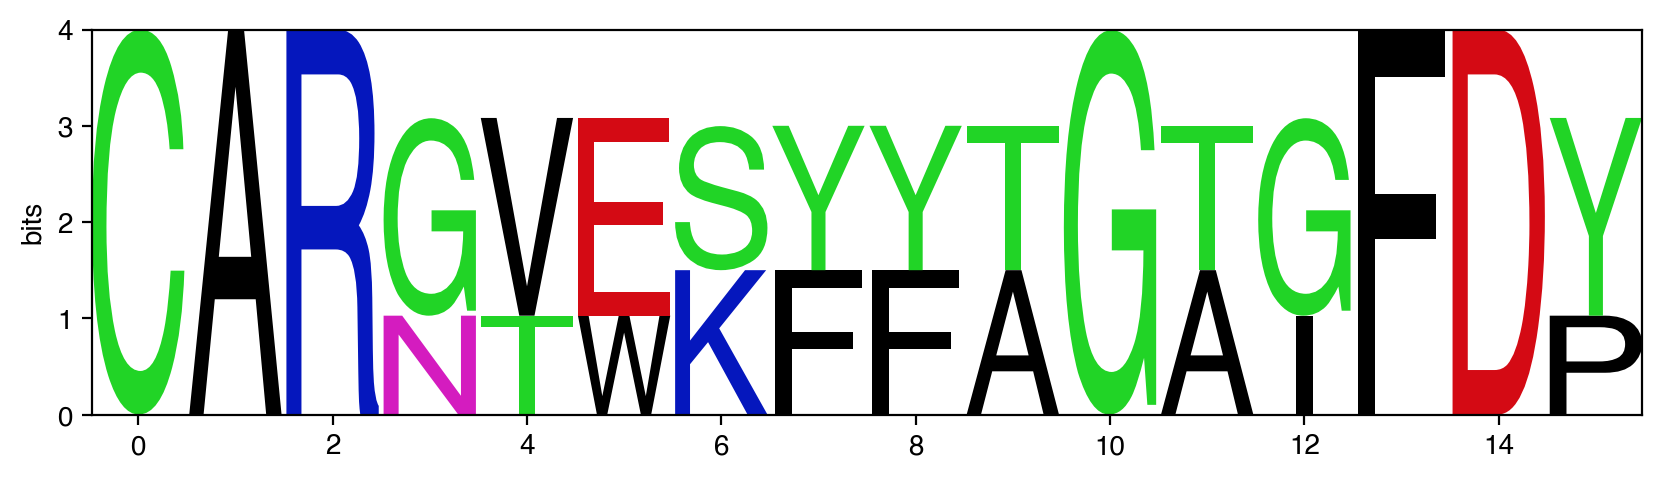

In [14]:
seqs = [add_cdr3_gaps(cdr3, max_len=ordered_success_df["CDR3"].str.len().max()) for cdr3 in ordered_success_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("bits")

In [15]:
[add_cdr3_gaps(cdr3, max_len=selected_df["CDR3"].str.len().max()) for cdr3 in selected_df["CDR3"]]

['CARSKYVY---WGDAFDY',
 'CARHGTIRPLTWGDAFDI',
 'CARGRPHRWTAWGDAFDI',
 'CARAEPARVSYWGDAFDI',
 'CARSWIQ-----LYAFDY',
 'CARSQSSQYSGWGDAFDI',
 'CARHQRGQYVAWGNAFDY',
 'CARHTPTHYALWGDAFDY',
 'CARNAEPNI--SGSAFDI',
 'CARVHSIR----YWLFDY',
 'CARSIDIAT--NEGYFDP',
 'CARGVEPYL--AGSGFDI',
 'CARGAKSY---NQIGFDY',
 'CARGYEAWY--SGSAFDP',
 'CARAVERYI--SGSGFDY',
 'CARGPLTWTASETDAFDY',
 'CARVRWVL----YAGFDY',
 'CARSPWLR----NAYFDY',
 'CARENWNYA--VYFPFDY',
 'CARIYGVT---YVWYFDP',
 'CARAILWLT-TALAGFDY',
 'CARDRPDLW--LPRGFDY',
 'CARVYGSY---PRGIFDY',
 'CARVSSFD---AYPGFDY',
 'CARNAERWL--AGSYFDP',
 'CARDEVEWGVQLYNAFDI',
 'CARNPSRES-GWGDPFDY',
 'CARDLHIGR--LANYFDP',
 'CARAIGHF---ERQGFDY']

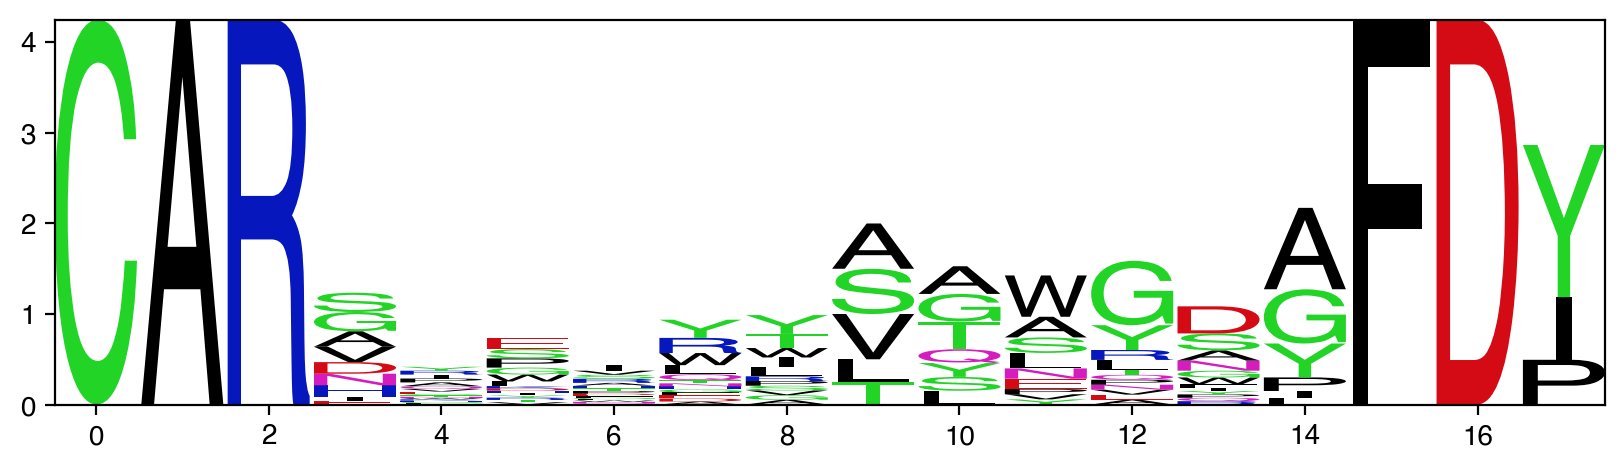

In [16]:
seqs = [add_cdr3_gaps(cdr3, max_len=selected_df["CDR3"].str.len().max()) for cdr3 in selected_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")

In [17]:
[add_cdr3_gaps(cdr3, max_len=success_df["CDR3"].str.len().max()) for cdr3 in success_df["CDR3"]]

['CARSKYVY---WGDAFDY',
 'CARHGTIRPLTWGDAFDI',
 'CARGRPHRWTAWGDAFDI',
 'CARAEPARVSYWGDAFDI',
 'CARSWIQ-----LYAFDY',
 'CARSQSSQYSGWGDAFDI',
 'CARHQRGQYVAWGNAFDY',
 'CARHTPTHYALWGDAFDY',
 'CARNAEPNI--SGSAFDI',
 'CARGVEPYL--AGSGFDI',
 'CARGYEAWY--SGSAFDP',
 'CARVSSFD---AYPGFDY']

Text(0, 0.5, 'bits')

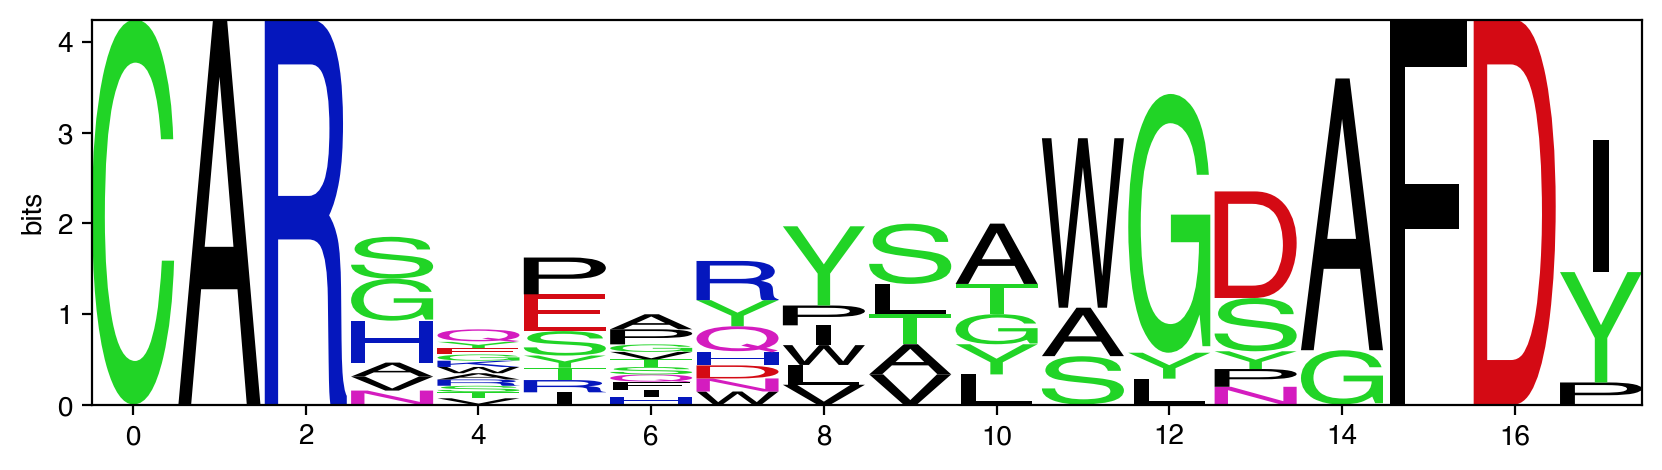

In [18]:
seqs = [add_cdr3_gaps(cdr3, max_len=success_df["CDR3"].str.len().max()) for cdr3 in success_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("bits")

Text(0, 0.5, 'bits')

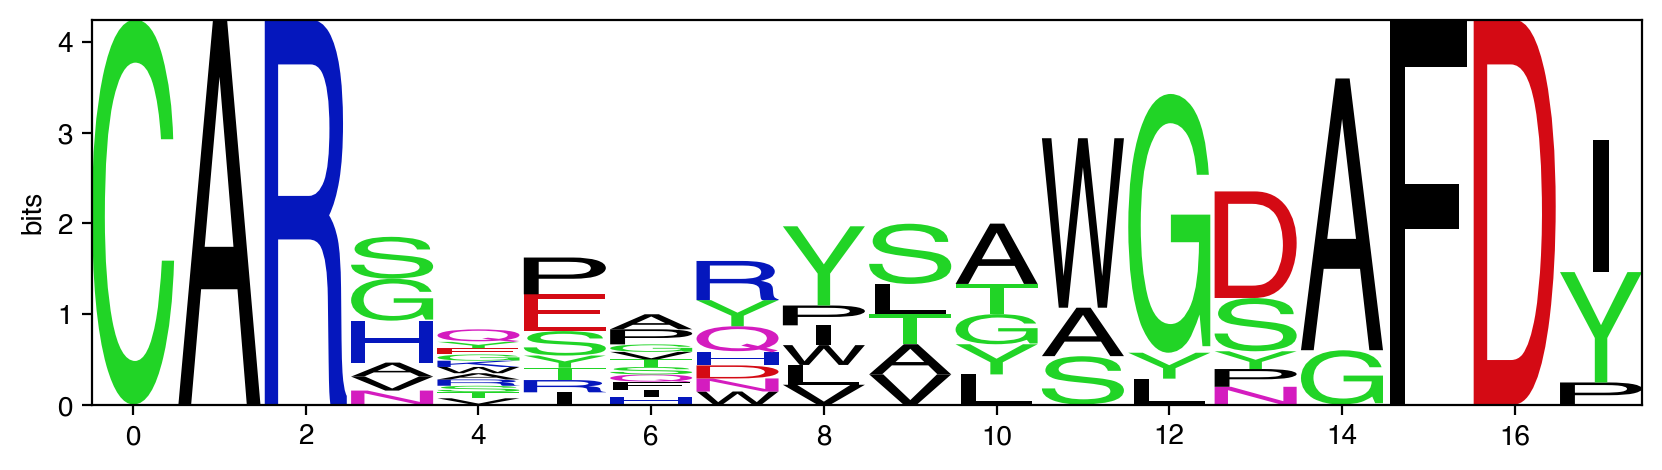

In [19]:
seqs = [add_cdr3_gaps(cdr3, max_len=success_df["CDR3"].str.len().max()) for cdr3 in success_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="information", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("bits")

Text(0, 0.5, 'probability')

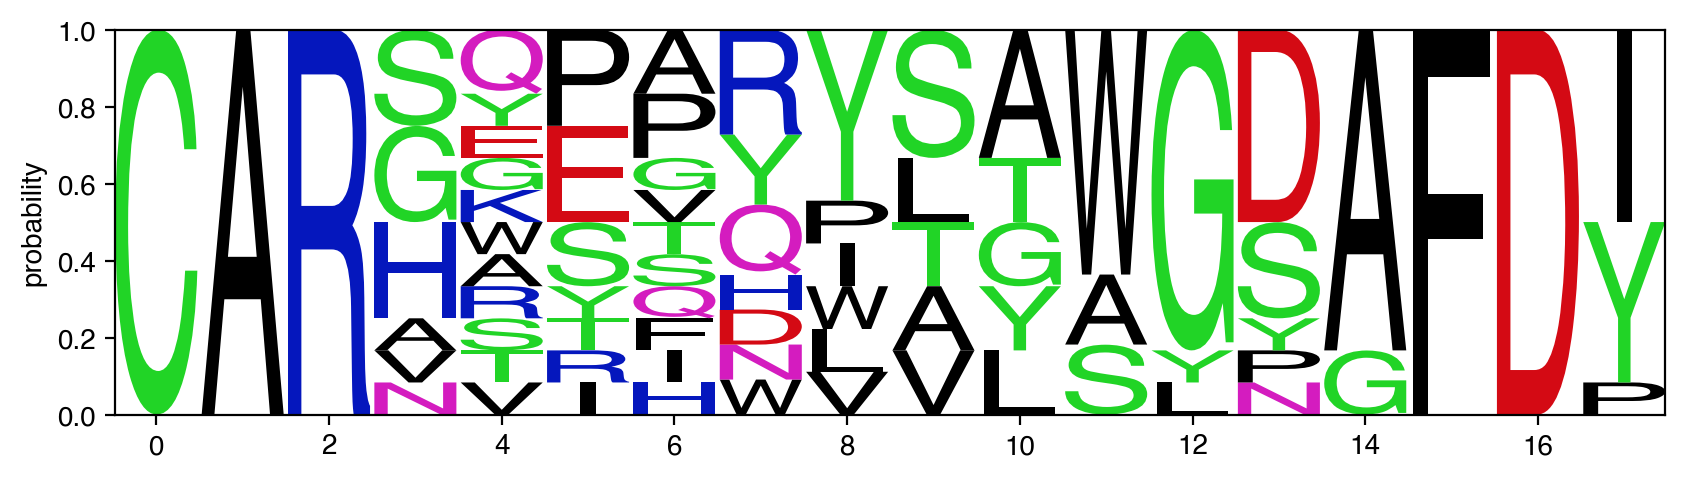

In [20]:
seqs = [add_cdr3_gaps(cdr3, max_len=success_df["CDR3"].str.len().max()) for cdr3 in success_df["CDR3"]]
counts_mat = logomaker.alignment_to_matrix(seqs, to_type="probability", pseudocount=0)
logomaker.Logo(counts_mat, color_scheme="weblogo_protein")
plt.ylabel("probability")

Text(0.5, 0, 'Min Dist. to FACS3')

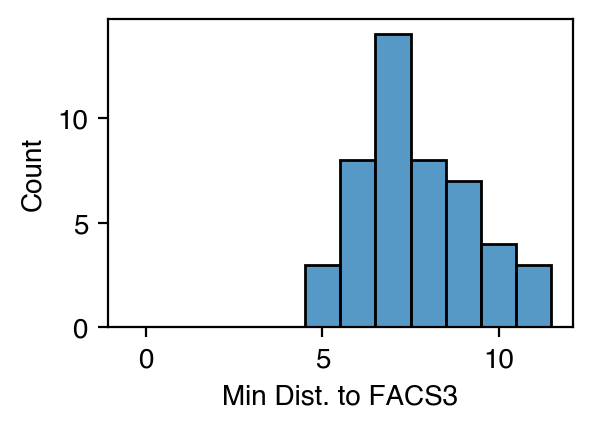

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.histplot(x="min_dist_to_ordered", data=df, color="C0", discrete=True, binrange=(0, 11))
plt.xlabel("Min Dist. to FACS3")

Text(0.5, 0, 'Min Dist. to FACS3')

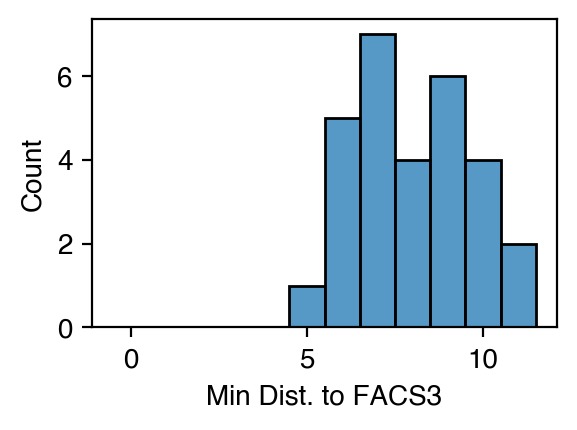

In [22]:
plot_df = df.dropna(subset=["min_dist_to_ordered", "Antibody_Name"]).copy()
plot_df["min_dist_to_facs3"] = plot_df["CDR3"].apply(min_levenshtein, seqs=df2[df2["Aff3"].fillna(0) > 0]["CDR3"])

fig, ax = plt.subplots(1, 1, figsize=(3, 2))
sns.histplot(x="min_dist_to_ordered", data=plot_df, color="C0", discrete=True, binrange=(0, 11))
plt.xlabel("Min Dist. to FACS3")

## ROBO1 scores

In [23]:
import pickle

import pandas as pd
import numpy as np

import sklearn.linear_model as lm
from sklearn.metrics import roc_curve, auc
import scipy.stats as stats

In [24]:
def filter_cdr3(seqs: pd.Series):
#     return s[:3] == "CAR" and s[-3:] in {"FDY", "LDY", "FDI", "FDP"}
    return (seqs.str[:3] == "CAR") & seqs.str[-3:].isin({"FDY", "LDY", "FDI", "FDP"})

In [25]:
def normalize_abundance(df, col):
    s = df[col].fillna(0)
    s = (s / s.sum()) * 1e6
    s[s < 1] = 1
    return s

# def filter_rounds(df, cols):
#     return df[(df[cols] > 5).any(axis=1)]

def calc_enrichment(df, col1, col2, col1_min=None, col2_min=None):
    s1, s2 = normalize_abundance(df, col1), normalize_abundance(df, col2)
    enrichment = np.log(s2) - np.log(s1)
    if col1_min is not None and col2_min is not None:
        enrichment[(df[col1].fillna(0) < col1_min) & (df[col2].fillna(0) < col2_min)] = 0
    elif col1_min is not None:
        enrichment[df[col1].fillna(0) < col1_min] = 0
    elif col2_min is not None:
        enrichment[df[col2].fillna(0) < col2_min] = 0
#     enrichment[(df[[col1, col2]].fillna(0) < 2).all(axis=1)] = 0
    return enrichment

In [26]:
def get_kmer_list(seq, include_framework=''):
    if 'C' in include_framework:
        seq = 'C' + seq
    if 'W' in include_framework:
        seq = seq + 'W'
    kmer_counts = {}

    kmer_len = 1
    num_chunks = (len(seq)-kmer_len)+1
    for idx in range(0,num_chunks):
        kmer = seq[idx:idx+kmer_len]
        assert len(kmer) == kmer_len
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
        else:
            kmer_counts[kmer] = 1

    kmer_len = 2
    num_chunks = (len(seq)-kmer_len)+1
    for idx in range(0,num_chunks):
        kmer = seq[idx:idx+kmer_len]
        assert len(kmer) == kmer_len
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
        else:
            kmer_counts[kmer] = 1

    kmer_len = 3
    num_chunks = (len(seq)-kmer_len)+1
    for idx in range(0,num_chunks):
        kmer = seq[idx:idx+kmer_len]
        assert len(kmer) == kmer_len
        if kmer in kmer_counts:
            kmer_counts[kmer] += 1
        else:
            kmer_counts[kmer] = 1
    #print kmer_counts
    return [(key,val) for key,val in kmer_counts.items()]

cdr3_alphabet = 'ACDEFGHIKLMNPQRSTVWY'
kmer_to_idx = {}
counter = 0
kmer_list = [aa for aa in cdr3_alphabet]
for aa in cdr3_alphabet:
    for bb in cdr3_alphabet:
        kmer_list.append(aa+bb)
        for cc in cdr3_alphabet:
            kmer_list.append(aa+bb+cc)

kmer_to_idx = {aa: i for i, aa in enumerate(kmer_list)}

def cdr3_seqs_to_arr(seqs, include_framework=''):
    seq_to_kmer_vector = {}
    for seq in seqs:
        # Make into kmers
        kmer_data_list = get_kmer_list(seq, include_framework=include_framework)
        norm_val = 0.
        for kmer,count in kmer_data_list:
            count = float(count)
            norm_val += (count * count)
        norm_val = np.sqrt(norm_val)

        # L2 normalize
        final_kmer_data_list = []
        for kmer,count in kmer_data_list:
            final_kmer_data_list.append((kmer_to_idx[kmer],float(count)/norm_val))

        # save to a dictionary
        seq_to_kmer_vector[seq] = final_kmer_data_list

    kmer_arr = np.zeros((len(seqs), len(kmer_to_idx)), dtype=np.float32)
    for i, seq in enumerate(seqs):
        kmer_vector = seq_to_kmer_vector[seq]
        for j_kmer,val in kmer_vector:
            kmer_arr[i, j_kmer] = val
    return kmer_arr

104289
102416
75463
75463
73949	69503	69503	6262	48	zenodo_data/hROBO1_Test1_Lib31.csv
75463
['VK1-39', 'VK3-15', 'VK3-20', 'VK4-01']
Categories (4, object): ['VK1-39' < 'VK3-15' < 'VK3-20' < 'VK4-01']
59159 4794 Train
14790 1198 Test
69503 1432 Aff3 Val
48 48 SPR Val


/Users/aaron/mambaforge/envs/py312/lib/python3.12/site-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.1.3 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Train AUC: 0.5402864282704771
Test AUC: 0.5388510476063205
Aff3/Macs1 AUC: 0.7912992218361554
Aff3 Spearman: 0.13317516705203605


/var/folders/1g/c3dw8nsj7gs0d1dlsb3gcw340000gn/T/ipykernel_26063/922128397.py:127: DtypeWarning: Columns (14,15,16,17,18,22,23,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  robo1_df = pd.read_csv(f"scores/hROBO1_Test1_Lib31_kmer_aff3_scores.csv")


SPR AUC: nan

WGD    18.110673
STH    14.321093
WGN    13.247707
AIG    12.726136
HNV    12.561655
         ...    
SAW   -10.272141
NRF   -10.310463
IAF   -10.552572
REW   -10.619279
SPV   -11.633461
Length: 1424, dtype: float64
A        -0.769192
C         8.938137
D        -0.084696
E        -0.340783
F         0.254216
            ...   
YWI      -5.128428
YWL       5.268954
YWY      -3.482901
VK1-39   -0.204287
VK3-20   -0.174658
Length: 1424, dtype: float64


/Users/aaron/mambaforge/envs/py312/lib/python3.12/site-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


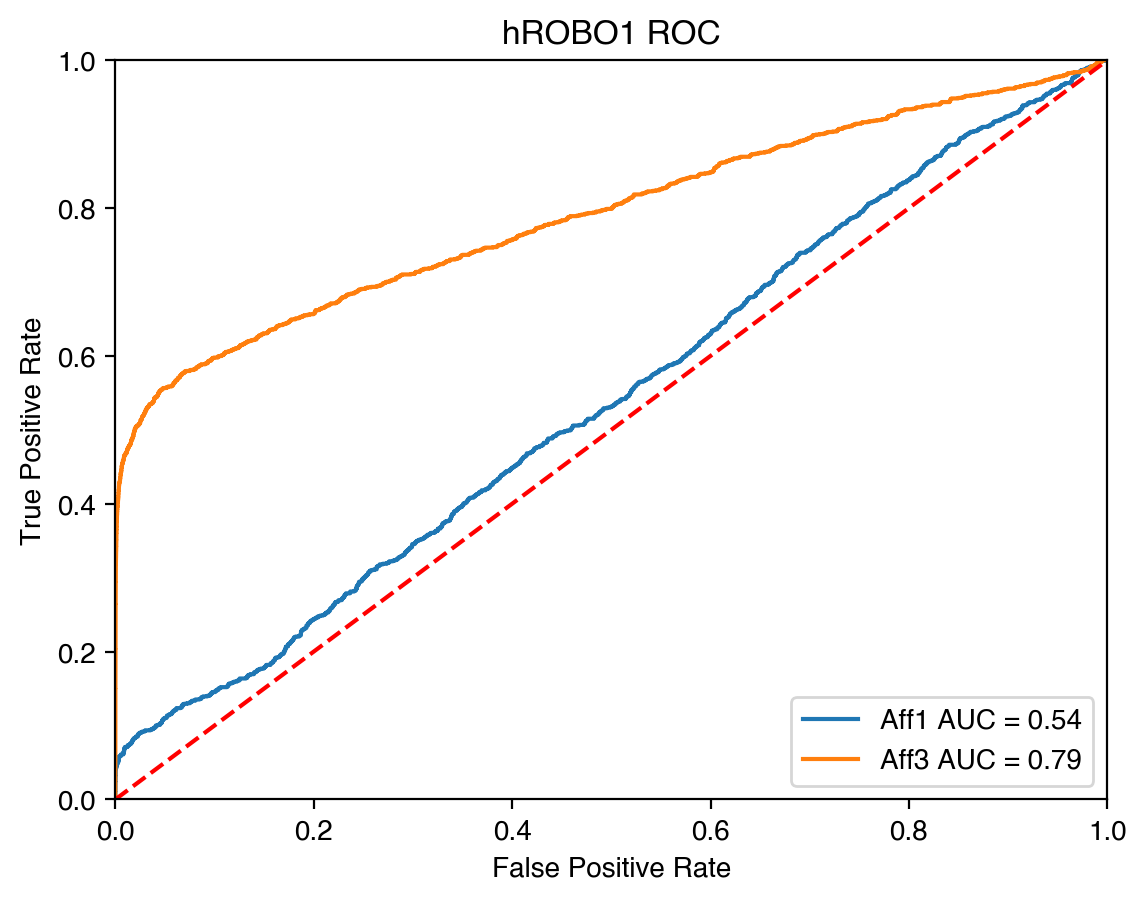

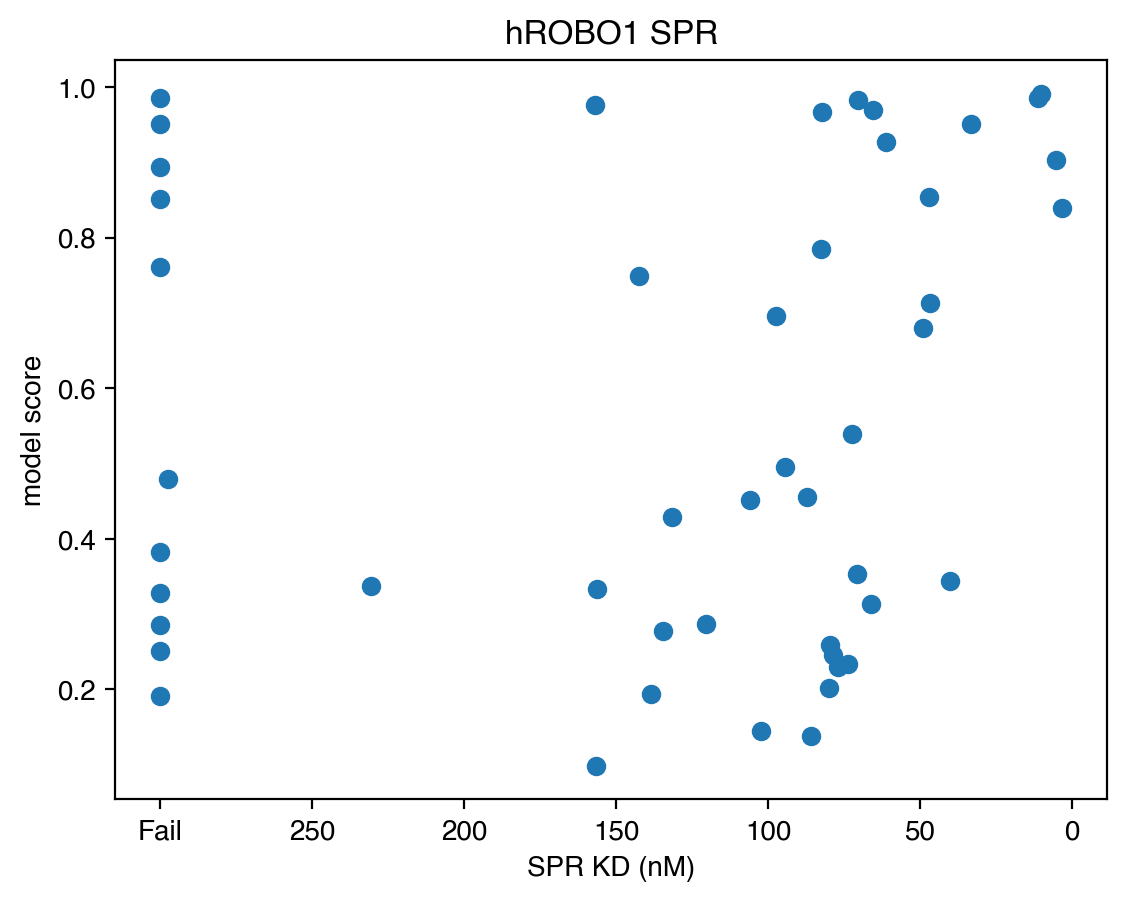

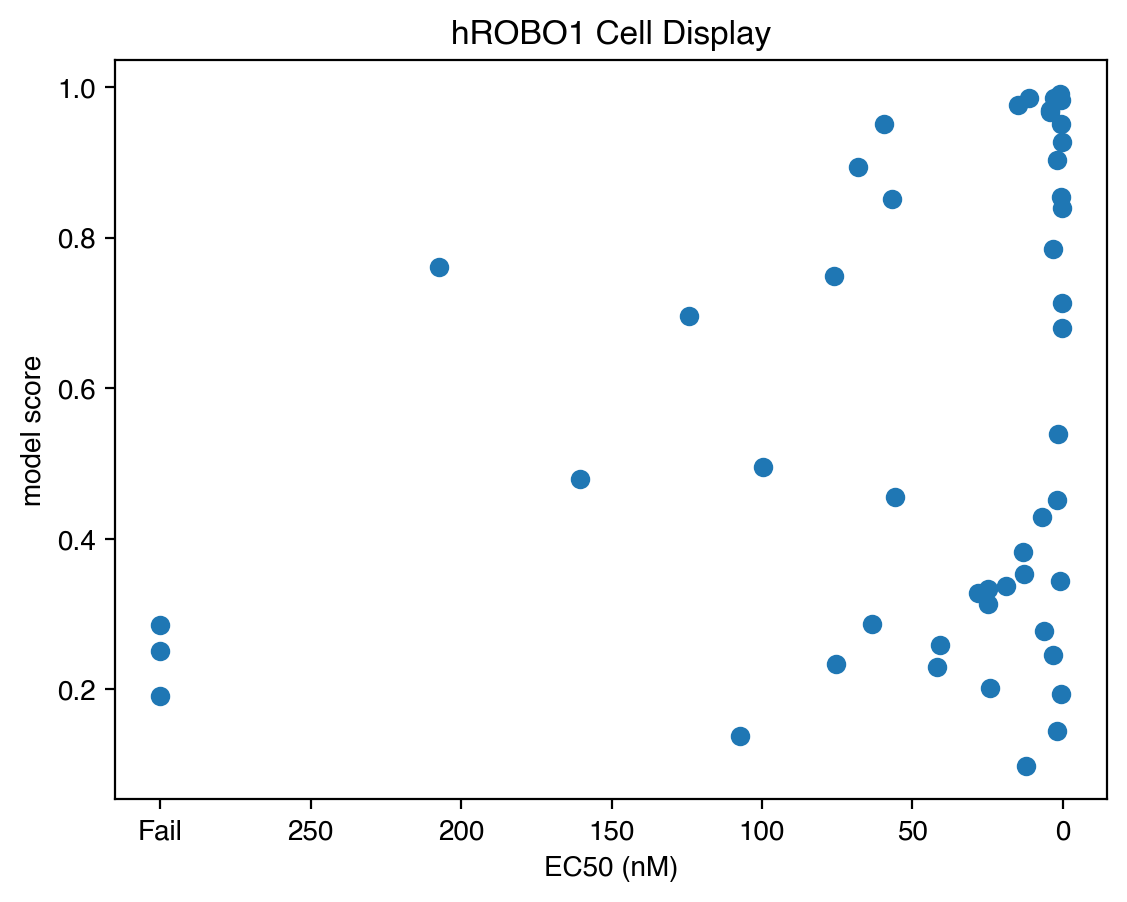

In [27]:
results = []

fname = "zenodo_data/hROBO1_Test1_Lib31.csv"
target = "hROBO1"
light_chains = IPI_3_VL_SEQS
heavy_chains = IPI_VH_SEQS
antigens = ["hROBO1"]
antigens2 = ["ROBO1"]
params_file = f"params/hROBO2N_Test1_Lib31_kmer_LR.pkl"
aff3_file = f"scores/hROBO1_Test1_Lib31_hROBO2N_train_kmer_aff3_scores.csv"

df = pd.read_csv(fname)
print(len(df))
df = df[filter_cdr3(df["CDR3"])]
print(len(df))
df = df[df["light"].isin(light_chains)]
print(len(df))
df = df[df["heavy"].isin(heavy_chains)]
print(len(df))

if "Macs1" not in df.columns:
    df["Macs1"] = df["Macs1_A1"]
    df["Aff1"] = df["Aff1_A1"]
    df["Aff2"] = df["Aff2_A1"]
    df["Aff3"] = df["Aff3_Combined"]

df["Aff1_Macs1"] = calc_enrichment(df, "Macs1", "Aff1")
df["Aff2_Macs1"] = calc_enrichment(df, "Macs1", "Aff2")
df["Aff2_Aff1"] = calc_enrichment(df, "Aff1", "Aff2")
df["Aff3_Macs1"] = calc_enrichment(df, "Macs1", "Aff2")
df["Aff3_Aff1"] = calc_enrichment(df, "Aff1", "Aff3")
df["Aff3_Aff2"] = calc_enrichment(df, "Aff2", "Aff3")

# char_df = pd.read_excel("Library3.1_VH1-69_AntibodyCharacterization_ForMarksLab.xlsx")
# char_df = pd.read_excel("IPI_Library_pilot_10targets.xlsx")
# char_df = char_df[char_df["Antigen"].isin(antigens)]
# char_df.loc[char_df["LC"] == "VK4-1_C", "LC"] = "VK4-1"
# char_df["key"] = char_df["CDRH3"] + ":" + char_df["HC"] + ":" + char_df["LC"]

char_df = pd.read_csv("zenodo_data/00Library_Biophysics_486Abs(1).csv", header=0, skiprows=1, names="Antibody_Name	Antigen	HC	LC	CDRH3	FACS1 count	FACS2 count	FACS3 count	PSR	SEC	SPR KD	SPR ka	SPR kdis (1/s)	Cell Display EC50".split('\t'))
char_df["key"] = char_df["CDRH3"] + ":" + char_df["HC"] + ":" + char_df["LC"]
char_df = char_df[char_df["Antigen"].isin(antigens2)]
char_df["SPR KD"] = char_df["SPR KD"].replace("Fail", 1000).astype(float)
char_df["Cell Display EC50"] = char_df["Cell Display EC50"].replace("Fail", 1000).astype(float)

df = pd.merge(df, char_df, on="key", how="left")

print((df["Aff1_Macs1"] != 0).sum(), (df["Aff2_Macs1"] != 0).sum(), (df["Aff3_Macs1"] != 0).sum(), (df["Aff3_Aff1"] != 0).sum(), len(char_df), fname, sep='\t')
#     assert len(df[(df["Aff1_Macs1"] != 0) & ((df["Macs1"] < 5) | df["Macs1"].isnull()) & ((df["Aff1"] < 5) | df["Aff1"].isnull())]) == 0

kmer_arr = cdr3_seqs_to_arr(df['CDR3'], include_framework='W')
# vh_onehot = pd.get_dummies(pd.Categorical(df['heavy'], categories=IPI_VH_SEQS_V2, ordered=True))
vl_onehot = pd.get_dummies(pd.Categorical(df['light'], categories=IPI_VL_SEQS, ordered=True))
length_onehot = pd.get_dummies(pd.Categorical(df['CDR3'].str.len(), ordered=True))
print(len(df))
# print(vh_onehot.columns.values)
print(vl_onehot.columns.values)
kmer_vh_vl_arr = np.concatenate([
    kmer_arr, 
#     vh_onehot.values,
    vl_onehot.values
], axis=1)
kmer_vh_vl_len_arr = np.concatenate([kmer_vh_vl_arr, length_onehot.values], axis=1)
kmer_arr_labels = kmer_list
kmer_vh_vl_arr_labels = (
    kmer_arr_labels +
#     vh_onehot.columns.tolist() +
    vl_onehot.columns.tolist()
)
kmer_vh_vl_len_arr_labels = kmer_vh_vl_arr_labels + length_onehot.columns.tolist()

char_kmer_arr = cdr3_seqs_to_arr(char_df['CDRH3'], include_framework='W')
char_vl_onehot = pd.get_dummies(pd.Categorical(char_df['LC'], categories=IPI_VL_SEQS, ordered=True))
char_kmer_vh_vl_arr = np.concatenate([
    char_kmer_arr, 
    char_vl_onehot.values
], axis=1)

X, X_labels, y = kmer_vh_vl_arr, kmer_vh_vl_arr_labels, df["Aff1_Macs1"].values
X = pd.DataFrame(X, columns=X_labels)
X, y = X[y != 0], y[y != 0]
np.random.seed(1)
msk = np.random.permutation(len(y)) < int(len(y) * 0.8)
X_train, X_test = X[msk], X[~msk]
y_train, y_test = y[msk], y[~msk]
print(len(y_train), (y_train > 0).sum(), "Train")
print(len(y_test), (y_test > 0).sum(), "Test")

X_val, y_val = kmer_vh_vl_arr, df["Aff3_Macs1"].values
X_val = pd.DataFrame(X_val, columns=X_labels)
X_val, y_val = X_val[y_val != 0], y_val[y_val != 0]
print(len(y_val), (y_val > 0).sum(), "Aff3 Val")

X_val2, y_val2 = char_kmer_vh_vl_arr, (char_df["SPR KD"].notnull() | (pd.to_numeric(char_df["Cell Display EC50"], errors="coerce") < 100))
X_val2 = pd.DataFrame(X_val2, columns=X_labels)
print(len(y_val2), (y_val2 > 0).sum(), "SPR Val")

# train model
thresh = 0.
with open(params_file, "rb") as f:
    clf = pickle.load(f)

y_score_train = clf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train > 0, y_score_train)
roc_auc_train = auc(fpr_train, tpr_train)
print("Train AUC:", roc_auc_train)

y_score = clf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test > 0, y_score)
roc_auc_test = auc(fpr_test, tpr_test)
print("Test AUC:", roc_auc_test)

y_score_val = clf.predict_proba(X_val)[:, 1]
fpr_val, tpr_val, _ = roc_curve(y_val > 0, y_score_val)
roc_auc_aff3_macs1 = auc(fpr_val, tpr_val)
print("Aff3/Macs1 AUC:", roc_auc_aff3_macs1)

X, X_labels, y = kmer_vh_vl_arr, kmer_vh_vl_arr_labels, df["Aff3"].values
X = pd.DataFrame(X, columns=X_labels)
#     X, y = X[y > 0], y[y > 0]
y_score = clf.predict_proba(X)[:, 1]
spearman_aff3 = stats.spearmanr(y_score[y > 0], y[y > 0])[0]
print("Aff3 Spearman:", spearman_aff3)
save_df = df.copy()
#     save_df = save_df[save_df["Aff3"] > 0]

robo1_df = pd.read_csv(f"scores/hROBO1_Test1_Lib31_kmer_aff3_scores.csv")
save_df["ROBO1_LR_score"] = pd.merge(save_df, robo1_df, on="key", how="left")["LR_score"]

save_df["ROBO2N_LR_score"] = y_score
save_df.to_csv(aff3_file, index=False)

if len(y_val2) != 0:
    y_score_val2 = clf.predict_proba(X_val2)[:, 1]
    fpr_val2, tpr_val2, _ = roc_curve(y_val2 > 0, y_score_val2)
    roc_auc_spr = auc(fpr_val2, tpr_val2)
    print("SPR AUC:", roc_auc_spr)

print()
coefs = pd.Series(index=clf.feature_names_in_, data=clf.coef_[0])
print(coefs[coefs != 0].sort_values(ascending=False))
print(coefs[coefs != 0])

results.append(dict(
    fname=fname,
    n_params=clf.coef_.shape[1],
    nonzero_params=(clf.coef_ != 0).sum(),
    roc_auc_train=roc_auc_train,
    roc_auc_test=roc_auc_test,
    spearman_aff3=spearman_aff3,
    roc_auc_aff3_macs1=roc_auc_aff3_macs1,
    roc_auc_spr=roc_auc_spr,
    train_size=len(y_train),
    train_positive=(y_train > 0).sum(),
    test_size=len(y_test),
    test_positive=(y_test > 0).sum(),
    aff3_size=len(y_val),
    aff3_positive=(y_val > 0).sum(),
    spr_size=len(y_val2),
    spr_positive=(y_val2 > 0).sum(),
))

# method I: plt
plt.title(f"{target} ROC")
plt.plot(fpr_test, tpr_test, 'C0', label = 'Aff1 AUC = %0.2f' % roc_auc_test)
plt.plot(fpr_val, tpr_val, 'C1', label = 'Aff3 AUC = %0.2f' % roc_auc_aff3_macs1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

fig, ax = plt.subplots()
plt.title(f"{target} SPR")
plt.scatter(char_df["SPR KD"].mask(lambda col: col > 300, 300), y_score_val2)
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("SPR KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xmajorticklabels()]
labels = ["Fail" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks(minor=False)[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

fig, ax = plt.subplots()
plt.title(f"{target} Cell Display")
plt.scatter(char_df["Cell Display EC50"].mask(lambda col: col > 300, 300), y_score_val2)
plt.gca().invert_xaxis()
plt.ylabel("model score")
plt.xlabel("EC50 (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xmajorticklabels()]
labels = ["Fail" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks(minor=False)[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

In [28]:
df[df['Antibody_Name'].notnull()]

,CDR3,heavy,light,key,Macs1,Aff1,Aff2,Aff3,Aff1_Macs1,Aff2_Macs1,...,CDRH3,FACS1 count,FACS2 count,FACS3 count,PSR,SEC,SPR KD,SPR ka,SPR kdis (1/s),Cell Display EC50
1,CARAVSWQSGWEGFDI,VH1-69,VK3-20,CARAVSWQSGWEGFDI:VH1-69:VK3-20,NaN,16.0,407.0,17450.0,5.526112,8.466942,...,CARAVSWQSGWEGFDI,16,407,17450,Pass,Pass,1000.00,Fail,Fail,1000.00
2,CARTVEQWFAGSGFDI,VH1-69,VK3-15,CARTVEQWFAGSGFDI:VH1-69:VK3-15,NaN,30.0,1779.0,14591.0,6.154721,9.941935,...,CARTVEQWFAGSGFDI,30,1779,14591,Pass,Pass,46.79,2.51E+04,1.17E-03,0.21
3,CARNVERNYAGSGFDI,VH1-69,VK3-15,CARNVERNYAGSGFDI:VH1-69:VK3-15,NaN,26.0,959.0,4711.0,6.011620,9.324019,...,CARNVERNYAGSGFDI,26,959,4711,Pass,Pass,61.29,4.30E+04,2.55E-03,0.26
5,CARGTYILDY,VH1-69,VK3-20,CARGTYILDY:VH1-69:VK3-20,NaN,62.0,1635.0,3041.0,6.880658,9.857526,...,CARGTYILDY,62,1635,3041,Pass,Pass,1000.00,Fail,Fail,68.05
7,CARERVSYRGWYFDY,VH1-69,VK1-39,CARERVSYRGWYFDY:VH1-69:VK1-39,NaN,12.0,60.0,1907.0,5.238430,6.552473,...,CARERVSYRGWYFDY,12,60,1907,Fail,Pass,1000.00,Fail,Fail,1000.00
8,CARNAEEWISGSAFDY,VH1-69,VK3-15,CARNAEEWISGSAFDY:VH1-69:VK3-15,NaN,25.0,625.0,1812.0,5.972399,8.895880,...,CARNAEEWISGSAFDY,25,625,1812,Fail,Pass,33.38,3.01E+04,9.90E-04,0.55
9,CARSGAVYWGDAFDY,VH1-69,VK3-15,CARSGAVYWGDAFDY:VH1-69:VK3-15,NaN,31.0,688.0,1473.0,6.187511,8.991917,...,CARSGAVYWGDAFDY,31,688,1473,Fail,Pass,82.32,1.81E+04,1.48E-03,4.14
12,CARDYDPFYRTYRGTFDI,VH1-69,VK3-15,CARDYDPFYRTYRGTFDI:VH1-69:VK3-15,NaN,83.0,257.0,860.0,7.172364,8.007204,...,CARDYDPFYRTYRGTFDI,83,257,860,Pass,Pass,628.54,3.75E+03,1.79E-03,28.29
13,CARAVERYISGSGFDY,VH1-69,VK3-15,CARAVERYISGSGFDY:VH1-69:VK3-15,NaN,166.0,2049.0,813.0,7.865511,10.083236,...,CARAVERYISGSGFDY,166,2049,813,Pass,Pass,46.90,2.75E+04,1.28E-03,0.49
14,CARVALAYWGDAFDY,VH1-69,VK3-15,CARVALAYWGDAFDY:VH1-69:VK3-15,NaN,28.0,1125.0,774.0,6.085728,9.483667,...,CARVALAYWGDAFDY,28,1125,774,Pass,Pass,70.35,2.18E+04,1.53E-03,0.65


In [29]:
save_df[save_df["Antibody_Name"].notnull()]

,CDR3,heavy,light,key,Macs1,Aff1,Aff2,Aff3,Aff1_Macs1,Aff2_Macs1,...,FACS2 count,FACS3 count,PSR,SEC,SPR KD,SPR ka,SPR kdis (1/s),Cell Display EC50,ROBO1_LR_score,ROBO2N_LR_score
1,CARAVSWQSGWEGFDI,VH1-69,VK3-20,CARAVSWQSGWEGFDI:VH1-69:VK3-20,NaN,16.0,407.0,17450.0,5.526112,8.466942,...,407,17450,Pass,Pass,1000.00,Fail,Fail,1000.00,0.789583,0.250929
2,CARTVEQWFAGSGFDI,VH1-69,VK3-15,CARTVEQWFAGSGFDI:VH1-69:VK3-15,NaN,30.0,1779.0,14591.0,6.154721,9.941935,...,1779,14591,Pass,Pass,46.79,2.51E+04,1.17E-03,0.21,0.776607,0.712632
3,CARNVERNYAGSGFDI,VH1-69,VK3-15,CARNVERNYAGSGFDI:VH1-69:VK3-15,NaN,26.0,959.0,4711.0,6.011620,9.324019,...,959,4711,Pass,Pass,61.29,4.30E+04,2.55E-03,0.26,0.724074,0.926475
5,CARGTYILDY,VH1-69,VK3-20,CARGTYILDY:VH1-69:VK3-20,NaN,62.0,1635.0,3041.0,6.880658,9.857526,...,1635,3041,Pass,Pass,1000.00,Fail,Fail,68.05,0.699108,0.893259
7,CARERVSYRGWYFDY,VH1-69,VK1-39,CARERVSYRGWYFDY:VH1-69:VK1-39,NaN,12.0,60.0,1907.0,5.238430,6.552473,...,60,1907,Fail,Pass,1000.00,Fail,Fail,1000.00,0.522970,0.285860
8,CARNAEEWISGSAFDY,VH1-69,VK3-15,CARNAEEWISGSAFDY:VH1-69:VK3-15,NaN,25.0,625.0,1812.0,5.972399,8.895880,...,625,1812,Fail,Pass,33.38,3.01E+04,9.90E-04,0.55,0.728571,0.951080
9,CARSGAVYWGDAFDY,VH1-69,VK3-15,CARSGAVYWGDAFDY:VH1-69:VK3-15,NaN,31.0,688.0,1473.0,6.187511,8.991917,...,688,1473,Fail,Pass,82.32,1.81E+04,1.48E-03,4.14,0.940421,0.966560
12,CARDYDPFYRTYRGTFDI,VH1-69,VK3-15,CARDYDPFYRTYRGTFDI:VH1-69:VK3-15,NaN,83.0,257.0,860.0,7.172364,8.007204,...,257,860,Pass,Pass,628.54,3.75E+03,1.79E-03,28.29,0.899658,0.328184
13,CARAVERYISGSGFDY,VH1-69,VK3-15,CARAVERYISGSGFDY:VH1-69:VK3-15,NaN,166.0,2049.0,813.0,7.865511,10.083236,...,2049,813,Pass,Pass,46.90,2.75E+04,1.28E-03,0.49,0.741335,0.853856
14,CARVALAYWGDAFDY,VH1-69,VK3-15,CARVALAYWGDAFDY:VH1-69:VK3-15,NaN,28.0,1125.0,774.0,6.085728,9.483667,...,1125,774,Pass,Pass,70.35,2.18E+04,1.53E-03,0.65,0.969176,0.983078


In [30]:
char_df

,Antibody_Name,Antigen,HC,LC,CDRH3,FACS1 count,FACS2 count,FACS3 count,PSR,SEC,SPR KD,SPR ka,SPR kdis (1/s),Cell Display EC50,key
268,ROBO1_Ab_001,ROBO1,VH1-69,VK3-20,CARAVSWQSGWEGFDI,16,407,17450,Pass,Pass,1000.00,Fail,Fail,1000.00,CARAVSWQSGWEGFDI:VH1-69:VK3-20
269,ROBO1_Ab_002,ROBO1,VH1-69,VK3-15,CARTVEQWFAGSGFDI,30,1779,14591,Pass,Pass,46.79,2.51E+04,1.17E-03,0.21,CARTVEQWFAGSGFDI:VH1-69:VK3-15
270,ROBO1_Ab_003,ROBO1,VH1-69,VK3-15,CARNVERNYAGSGFDI,26,959,4711,Pass,Pass,61.29,4.30E+04,2.55E-03,0.26,CARNVERNYAGSGFDI:VH1-69:VK3-15
271,ROBO1_Ab_004,ROBO1,VH1-69,VK1-39,CARERVSYRGWYFDY,12,60,1907,Fail,Pass,1000.00,Fail,Fail,1000.00,CARERVSYRGWYFDY:VH1-69:VK1-39
272,ROBO1_Ab_005,ROBO1,VH1-69,VK3-15,CARNAEEWISGSAFDY,25,625,1812,Fail,Pass,33.38,3.01E+04,9.90E-04,0.55,CARNAEEWISGSAFDY:VH1-69:VK3-15
273,ROBO1_Ab_006,ROBO1,VH1-69,VK3-15,CARSGAVYWGDAFDY,31,688,1473,Fail,Pass,82.32,1.81E+04,1.48E-03,4.14,CARSGAVYWGDAFDY:VH1-69:VK3-15
274,ROBO1_Ab_007,ROBO1,VH1-69,VK3-15,CARDYDPFYRTYRGTFDI,83,257,860,Pass,Pass,628.54,3.75E+03,1.79E-03,28.29,CARDYDPFYRTYRGTFDI:VH1-69:VK3-15
275,ROBO1_Ab_008,ROBO1,VH1-69,VK3-15,CARAVERYISGSGFDY,166,2049,813,Pass,Pass,46.90,2.75E+04,1.28E-03,0.49,CARAVERYISGSGFDY:VH1-69:VK3-15
276,ROBO1_Ab_009,ROBO1,VH1-69,VK3-15,CARVALAYWGDAFDY,28,1125,774,Pass,Pass,70.35,2.18E+04,1.53E-03,0.65,CARVALAYWGDAFDY:VH1-69:VK3-15
277,ROBO1_Ab_010,ROBO1,VH1-69,VK3-20,CARPPQPFYATNQWYFDI,21,205,566,Pass,Pass,131.51,1.13E+04,1.45E-03,6.80,CARPPQPFYATNQWYFDI:VH1-69:VK3-20


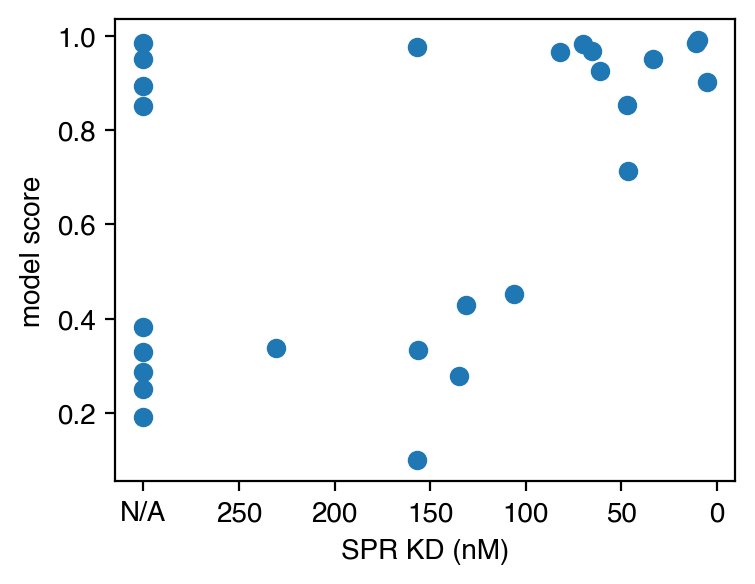

In [31]:
plot_df = save_df[save_df["Antibody_Name"].notnull()].copy()
plot_df.loc[plot_df["SPR KD"] > 300, "SPR KD"] = np.nan
fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(plot_df["SPR KD"].fillna(300), plot_df["ROBO2N_LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("SPR KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

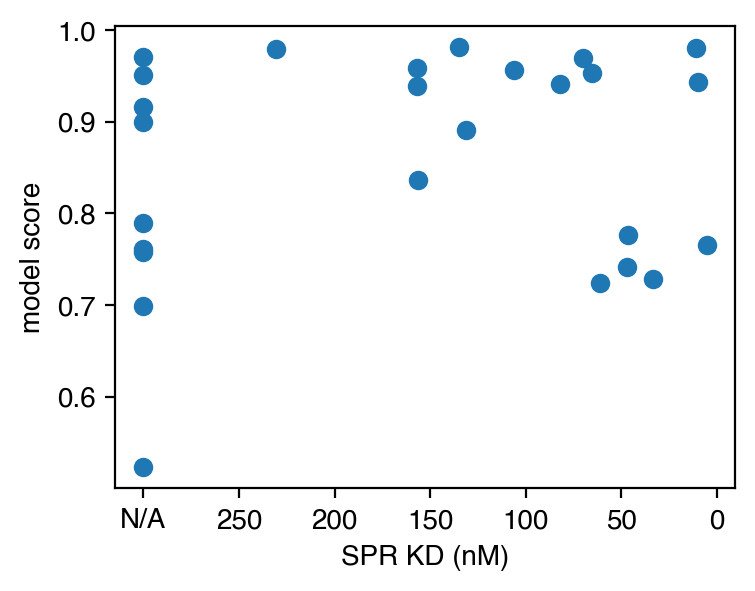

In [32]:
plot_df = save_df[save_df["Antibody_Name"].notnull()].copy()
plot_df.loc[plot_df["SPR KD"] > 300, "SPR KD"] = np.nan
fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(plot_df["SPR KD"].fillna(300), plot_df["ROBO1_LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("SPR KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

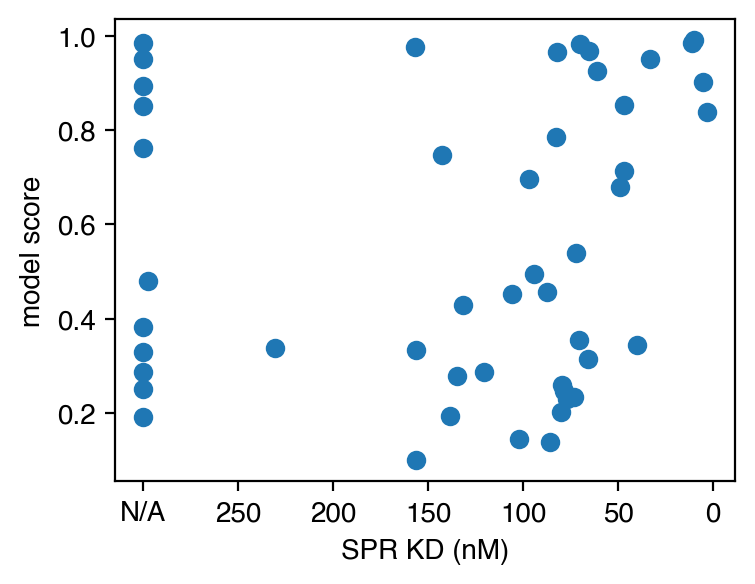

In [33]:
plot_df = char_df.copy()
plot_df['LR_score'] = y_score_val2
plot_df.loc[plot_df["SPR KD"] > 300, "SPR KD"] = np.nan

fig, ax = plt.subplots(figsize=(4,3))
# plt.title(f"ROBO2N SPR")
plt.scatter(plot_df["SPR KD"].fillna(300), plot_df["LR_score"])
ax.invert_xaxis()
plt.ylabel("model score")
plt.xlabel("SPR KD (nM)")
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = ["N/A" if item == "300" else item for item in labels]
ax.set_xticks(ax.get_xticks().tolist()[1:-1])
ax.set_xticklabels(labels[1:-1])
plt.show()

In [34]:
plot_df

,Antibody_Name,Antigen,HC,LC,CDRH3,FACS1 count,FACS2 count,FACS3 count,PSR,SEC,SPR KD,SPR ka,SPR kdis (1/s),Cell Display EC50,key,LR_score
268,ROBO1_Ab_001,ROBO1,VH1-69,VK3-20,CARAVSWQSGWEGFDI,16,407,17450,Pass,Pass,NaN,Fail,Fail,1000.00,CARAVSWQSGWEGFDI:VH1-69:VK3-20,0.250929
269,ROBO1_Ab_002,ROBO1,VH1-69,VK3-15,CARTVEQWFAGSGFDI,30,1779,14591,Pass,Pass,46.79,2.51E+04,1.17E-03,0.21,CARTVEQWFAGSGFDI:VH1-69:VK3-15,0.712632
270,ROBO1_Ab_003,ROBO1,VH1-69,VK3-15,CARNVERNYAGSGFDI,26,959,4711,Pass,Pass,61.29,4.30E+04,2.55E-03,0.26,CARNVERNYAGSGFDI:VH1-69:VK3-15,0.926475
271,ROBO1_Ab_004,ROBO1,VH1-69,VK1-39,CARERVSYRGWYFDY,12,60,1907,Fail,Pass,NaN,Fail,Fail,1000.00,CARERVSYRGWYFDY:VH1-69:VK1-39,0.285860
272,ROBO1_Ab_005,ROBO1,VH1-69,VK3-15,CARNAEEWISGSAFDY,25,625,1812,Fail,Pass,33.38,3.01E+04,9.90E-04,0.55,CARNAEEWISGSAFDY:VH1-69:VK3-15,0.951080
273,ROBO1_Ab_006,ROBO1,VH1-69,VK3-15,CARSGAVYWGDAFDY,31,688,1473,Fail,Pass,82.32,1.81E+04,1.48E-03,4.14,CARSGAVYWGDAFDY:VH1-69:VK3-15,0.966560
274,ROBO1_Ab_007,ROBO1,VH1-69,VK3-15,CARDYDPFYRTYRGTFDI,83,257,860,Pass,Pass,NaN,3.75E+03,1.79E-03,28.29,CARDYDPFYRTYRGTFDI:VH1-69:VK3-15,0.328184
275,ROBO1_Ab_008,ROBO1,VH1-69,VK3-15,CARAVERYISGSGFDY,166,2049,813,Pass,Pass,46.90,2.75E+04,1.28E-03,0.49,CARAVERYISGSGFDY:VH1-69:VK3-15,0.853856
276,ROBO1_Ab_009,ROBO1,VH1-69,VK3-15,CARVALAYWGDAFDY,28,1125,774,Pass,Pass,70.35,2.18E+04,1.53E-03,0.65,CARVALAYWGDAFDY:VH1-69:VK3-15,0.983078
277,ROBO1_Ab_010,ROBO1,VH1-69,VK3-20,CARPPQPFYATNQWYFDI,21,205,566,Pass,Pass,131.51,1.13E+04,1.45E-03,6.80,CARPPQPFYATNQWYFDI:VH1-69:VK3-20,0.428834


In [35]:
plot_df[plot_df["Antibody_Name"].isin([
    "ROBO1_Ab_006",
    "ROBO1_Ab_009",
    "ROBO1_Ab_014",
    "ROBO1_Ab_021",
    "ROBO1_Ab_022",
    "ROBO1_Ab_025",
])]

,Antibody_Name,Antigen,HC,LC,CDRH3,FACS1 count,FACS2 count,FACS3 count,PSR,SEC,SPR KD,SPR ka,SPR kdis (1/s),Cell Display EC50,key,LR_score
273,ROBO1_Ab_006,ROBO1,VH1-69,VK3-15,CARSGAVYWGDAFDY,31,688,1473,Fail,Pass,82.32,1.81E+04,1.48E-03,4.14,CARSGAVYWGDAFDY:VH1-69:VK3-15,0.966560
276,ROBO1_Ab_009,ROBO1,VH1-69,VK3-15,CARVALAYWGDAFDY,28,1125,774,Pass,Pass,70.35,2.18E+04,1.53E-03,0.65,CARVALAYWGDAFDY:VH1-69:VK3-15,0.983078
281,ROBO1_Ab_014,ROBO1,VH1-69,VK3-15,CARSQYEYWGDAFDY,22,1033,345,Pass,Pass,65.34,2.12E+04,1.38E-03,4.08,CARSQYEYWGDAFDY:VH1-69:VK3-15,0.969259
288,ROBO1_Ab_021,ROBO1,VH1-69,VK3-15,CARSGSLYWGDAFDY,52,1023,372,Pass,Pass,11.10,9.43E+05,1.04E-02,2.87,CARSGSLYWGDAFDY:VH1-69:VK3-15,0.985481
289,ROBO1_Ab_022,ROBO1,VH1-69,VK3-15,CARSQSKYWGDAFDY,162,1766,313,Pass,Pass,10.10,8.49E+05,8.33E-03,1.03,CARSQSKYWGDAFDY:VH1-69:VK3-15,0.990847
292,ROBO1_Ab_025,ROBO1,VH1-69,VK3-15,CARGSAVYWGDAFDY,22,553,113,Pass,Pass,NaN,Fail,Fail,11.14,CARGSAVYWGDAFDY:VH1-69:VK3-15,0.985680
